# Introduction to Colab Notebooks
Hello and welcome to your first notebook! With a notebook, you can write and run code in different little "cells". There are two types of "cells": text (markdown) cells and code cells. This cell is a text/markdown cell, but what we really care about are the code cells. Try creating one with the "+ code" button in the top let corner. Also try running a few lines of code in it.


**Basic Colab Notebooks commands** 

To get a list of all commands do: ctrl + M + H, but here's a few to start off.

ctrl + enter: run a cell

shift + enter: run a cell and move to the next cell: 

**Variables and Notebooks**

All variables are preserved across the notebook. That means that if you declare a variable "var" in cell 1, you can access it in cell 2. Note that not all variables are global variables, and the same scopes as normal exist. Also note that variables are reset every time you restart the notebook.

In [0]:
a = "Some random variable"

In [0]:
print(a)

Some random variable


**Inturrupting Cells**

Sometimes you might accidentally run code that will take a very long time. There's also a way to inturrupt cells by pressing the stop button on the left of the cell.

In [0]:
import time
while True:
  time.sleep(1)

**Uploading Files**

To upload files, simply look at the menu to your left and click "Files". Note that you need to connect by pressing the "connect" button in the top right corner. Connect to a hosted runtime.

Then, look in the class folder, download the "white_wine.csv". Then upload them to the notebook.

Note that you'll need to upload new csv files everytime you open this notebook.

# Wine Quality Prediction

In [0]:
'''
A bunch of imports.

The csv library is for reading ".csv" files (things like spreadsheets)
keras is our main library for machine learning
numpy is short for number python, and it's a really nice library for all things
mathematical.

Mattplotlib.pyplot is plotting software we'll be using.
'''
import csv
import keras
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Processing Data

In [0]:
'''
This is a function I wrote to read csv files.
Understanding this isn't too important; please skip over it for now.
'''
def read_csv(file_name):
  data = []
  
  with open(file_name) as file:
    header = file.readline()
    
    def readline(string):
      string = string.replace('"', '')
      string = string.replace('\n', '')
      array = string.split(';')
      
      return array
    
    header = readline(header)
    
    for line in file:
      data_point = readline(line)
      data_point = [(float)(number) for number in data_point]
      data.append(data_point)
  
  return header, data

def display(header, data):
  import pandas as pd
  import copy
  total_data = [[header[i] for i in range(len(header))]] + copy.deepcopy(data)
  df = pd.DataFrame(total_data)
  print(df.head())

In [0]:
'''
Here's our data. white_wine is a 2D list:
 
[[a0, a1, a2, a3, a4, a5, ..., a11],
 [b0, b1, b2, b3, b4, b5, ..., b11],
 [c0, c1, c2, c3, c4, c5, ..., c11], ...]

In this situation, each row [a0, a1, ..., a12] represents an example of a bottle of wine.
Each column a0, b0, c0, ..., etc. represents a "feature" or an aspect of that wine.

For example, a0 represents the "fixed acidity" of the first example. b0 represents
the "fixed acidity" of the second example, etc.
'''

header, white_wine = read_csv("white_wine.csv")

NameError: ignored

In [0]:
'''
This is the first example in our dataset.
This specific bottle of wine had 7.0 fixed acidity, 0.27 volatile acidity, etc.
Finally, at the very end we have that this bottle of wine had a quality of 6 out of 10.

A more thorough look at the dataset can be seen here:
https://docs.google.com/spreadsheets/d/1B7z_-5I_ZMfco28e1yUSK_qLCfxcd6P1SgGLADhUEKk/edit?usp=sharing
'''

display(header, white_wine)

              0                 1            2               3          4   \
0  fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
1              7              0.27         0.36            20.7      0.045   
2            6.3               0.3         0.34             1.6      0.049   
3            8.1              0.28          0.4             6.9       0.05   
4            7.2              0.23         0.32             8.5      0.058   

                    5                     6        7     8          9   \
0  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
1                   45                   170    1.001     3       0.45   
2                   14                   132    0.994   3.3       0.49   
3                   30                    97   0.9951  3.26       0.44   
4                   47                   186   0.9956  3.19        0.4   

        10       11  
0  alcohol  quality  
1      8.8        6  
2      9.5        6 

In [0]:
'''
Here, we divide up our datapoints of our white_wine into inputs for our model
as well as outputs for our model.

X represents our inputs; y represents our outputs.

The 11th element in a data_point is the quality on a scale of 1-10 as rated
by experts.

We try to use our 0th - 10th elements and predict that.
'''

y = []
X = []
for data_point in white_wine:
  y.append(data_point[11])
  X.append(data_point[:11])
  
# cast to numpy arrays
y = np.array(y).astype("float64")
X = np.array(X).astype("float64")

Text(0.5,0,'Fixed Acidity')

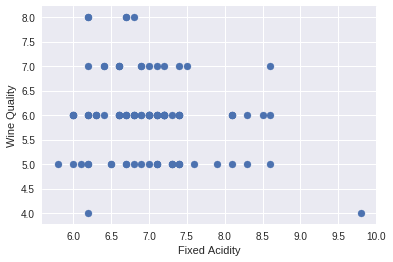

In [0]:
'''
Let's look at some pictures!
'''

%matplotlib inline

x_ = X[0:100]
y_ = y[0:100]

# Try changing the index. Right now the thing will disply "fixed_acidity".
# See if you can find something with a better linear relationship.
input_data = [data_point[0] for data_point in x_]

plt.scatter(input_data, y_)
plt.ylabel('Wine Quality')
plt.xlabel('Fixed Acidity')

## Building a Model

In [0]:
'''
We create a simple Sequential keras model. A Sequential object is the framework
for models in keras. Right now our Sequential model is empty, so it won't do
anything. We'll need to add things into it first.
'''

model = keras.models.Sequential()

In [0]:
'''
A "Dense" object is keras' version of linear regression. Note that we input a 1
into the "Dense" constructor because we have 1 output.

When looking at input_shape, we give the size of each example.
'''

linear_regressor = keras.layers.Dense(1, input_shape=(11,))
model.add(linear_regressor)

In [0]:
'''
We need to compile a model before we run it. "opt" here is an optimizer, basically
a way of getting better. Here, we let opt = SGD, which stands for Stochastic Gradient Descent.

lr here means "learning rate." This is the step size of your gradient descent. 
If the model isn't training fast enough, try increasing it. If the model is getting
worse, try decreasing it.

Loss is mean squared error. This is what we try to minimize.
'''
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mean_absolute_error'])

In [0]:
'''
The line
--history = model.fit(X, y, epochs = 100)--
stores the history of how the model learned in a variable called history

(Look below for an explanation of the output.)
'''
history = model.fit(X, y, epochs = 100)

NameError: ignored

In [0]:
'''
Congradulations! You've trained your first model! Let's see what the code's outputting.

Epoch 24/100
4898/4898 [==============================] - 0s 31us/step - loss: 1.8401 - mean_absolute_error: 1.0712

An epoch is a runthrough of the data. We can see that this is the 24th epoch out of the 100
which it plans to run.

4898 is the total number of examples in our data. To finish an epoch, the model has 
to train on all 4898 datapoints.

The whole epoch took 0s to run for me; it took 31us (microseconds) for each step.

loss: 1.8401 This is the average of the squared error for each datapoint. Note that
it uses squared error because we set loss = 'mean_squared_error' when compiling.

mean_absolute_error: 1.071. This is an error metric we can kinda understand.
On average, it's guesses are around 1 point off the right answer.

So, for instance, if the bottle of wine actually is a 7/10, on average, it might gueses a 6/10.
'''

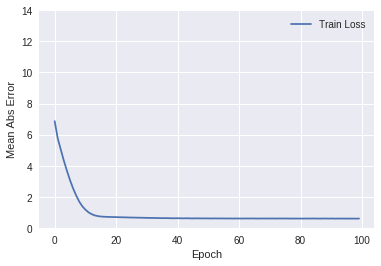

In [0]:
#We can plot how the model learned over time
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
  plt.legend()
  plt.ylim([0, 14])

plot_history(history)

## Displaying Results

In [0]:
'''
Time to see how we're doing!
'''

%matplotlib inline

x_subset = X[0:100]
y_ans = y[0:100]

In [0]:
index1 = 0

# Plot the predictions of the model vs the actual answers
y_guess = model.predict(x_subset)

# Here, we extract the feature point which we want to plot against. if index1 = 0,
# for example, then we're plotting y against "fixed_acidity"
x_plot = [data_point[index1] for data_point in x_subset]

plt.scatter(x_plot, y_guess, label = 'Guess')
plt.scatter(x_plot, y_ans, label = 'Real Value')
plt.xlabel('Fixed Acidity')
plt.ylabel('Wine Quality')
plt.legend()

In [0]:
#You can change this around
index2 = 0

# Plot the impact of the different features vs the actual answers
# We do this by setting all features equal to zero except for the one we're interested in
x_input = []

for i in range(len(x_subset)):
  data_point = [0 for i in range(11)]
  data_point[index2] = x_subset[i][index2]
  x_input.append(data_point)

x_input = np.array(x_input)

# Once again, we need to strip away all the features except for the one we're interested in.
x_plot = [x_input[i][index2] for i in range(len(x_input))]

y_guess = model.predict(x_input)

plt.scatter(x_plot, y_guess)
plt.scatter(x_plot, y_ans)

# Note: in this specific dataset, only one input has an especially strong 
# correlation with the output quality. See if you can find it!

# Diabetes Prediction
Alright, so in this implementation, you're going to try your hand at building a model and playing around with it.

For future reference, the keras documentation is keras.io and for matplotlib, just google your question.

If you have any question, you can also ask Joshua or Oliver.

## Processing Data
We use the diabetes dataset from the sklearn library. The 2D list "x" has dimensions 442 x 10, meaning that it has 442 datapoints and 10 features per datapoint.

In [0]:
from sklearn.datasets import load_diabetes

x, y = load_diabetes(return_X_y=True)

## Building a Model
In this subsection, try building your own sequential model and adding a dense layer into it.

Then try compiling and running it!


## Displaying Results
In this section, try displaying 
1. the model's answers vs the actual answers
2. the impact each features has in the model.

## Extra Things in Case Anyone Gets this Far
If you've finished everything, you can try building more complex models. It turns out that you can add more than one layer to a sequential model, try doing stuff with that. 

Look at link:
https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

and the keras documentation, and try defining models of more than one layer. Things like "activation" might be a bit confusing; we'll go over that in more detail next class. For now, just try and get a better loss than your linear model.